In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# "magic" command to make plots show up in the notebook
%matplotlib inline 

In [2]:
# this should be the path to the data.  Adapt for your system
win_filepath = 'C:/Users/ngeorge/Documents/GitHub/preprocess_lending_club_data/full_data/'
# same path from virtualbox shared folder
linux_filepath = '/media/sf_C_DRIVE/Users/ngeorge/Documents/GitHub/preprocess_lending_club_data/full_data/'

In [3]:
acc_df = pd.read_csv(linux_filepath + 'accepted_2007_to_2016.csv.gz')
rej_df = pd.read_csv(linux_filepath + 'rejected_2007_to_2016.csv.gz')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.options.display.max_columns

20

In [5]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [6]:
acc_df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1.2966e+06,1.31417e+06,1.31352e+06,1.27718e+06,1.31175e+06
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [7]:
acc_df.tail().T

,1321842,1321843,1321844,1321845,1321846
id,89885898,88977788,88985880,88224441,88215728
member_id,9.62797e+07,9.53207e+07,9.53287e+07,9.45252e+07,9.45164e+07
loan_amnt,24000,24000,40000,24000,14000
funded_amnt,24000,24000,40000,24000,14000
funded_amnt_inv,24000,24000,40000,24000,14000
term,60 months,60 months,60 months,60 months,60 months
int_rate,12.79,10.49,10.49,14.49,14.49
installment,543.5,515.74,859.56,564.56,329.33
grade,C,B,B,C,C
sub_grade,C1,B3,B3,C4,C4


In [8]:
acc_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321847 entries, 0 to 1321846
Data columns (total 110 columns):
id                                1321847 non-null int64
member_id                         1321847 non-null float64
loan_amnt                         1321847 non-null float64
funded_amnt                       1321847 non-null float64
funded_amnt_inv                   1321847 non-null float64
term                              1321847 non-null object
int_rate                          1321847 non-null float64
installment                       1321847 non-null float64
grade                             1321847 non-null object
sub_grade                         1321847 non-null object
emp_title                         1241887 non-null object
emp_length                        1321847 non-null object
home_ownership                    1321847 non-null object
annual_inc                        1321843 non-null float64
verification_status               1321847 non-null object
issue_d   

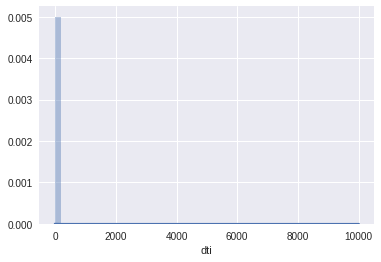

In [9]:
# docs: http://seaborn.pydata.org/generated/seaborn.distplot.html
# found by Googling 'seaborn histogram'
f = sns.distplot(acc_df['dti'])

In [10]:
# outliers are screwing up the histogram... remove them
# adapted from http://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
# we're using interquartile range to determine outliers
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    """
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles
    """
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print 'options for side are left, right, or both'
    
    if return_mask:
        return mask
    
    return sr[mask]

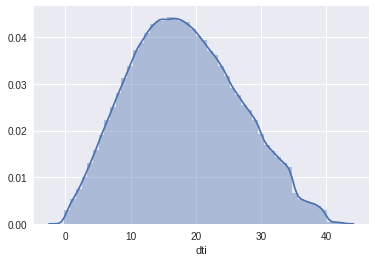

In [11]:
# sweeeeeeeetttt....
dti_no_outliers = reject_outliers(acc_df['dti'], iq_range=0.85) # arrived at 0.85 via trial and error
f = sns.distplot(dti_no_outliers)
# other types of plot examples:
# http://seaborn.pydata.org/examples/

In [12]:
# sets the xkcd style
plt.xkcd()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


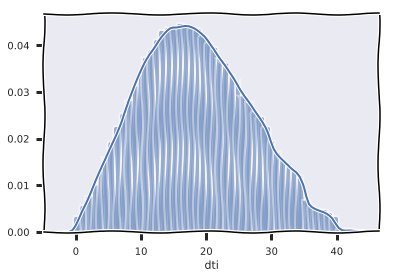

In [13]:
f = sns.distplot(dti_no_outliers)

In [14]:
# back to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

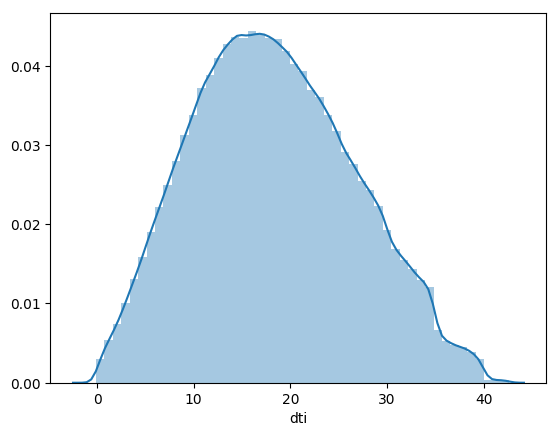

In [15]:
f = sns.distplot(dti_no_outliers)

In [16]:
# other styles:
# http://matplotlib.org/users/style_sheets.html
plt.style.use('ggplot')

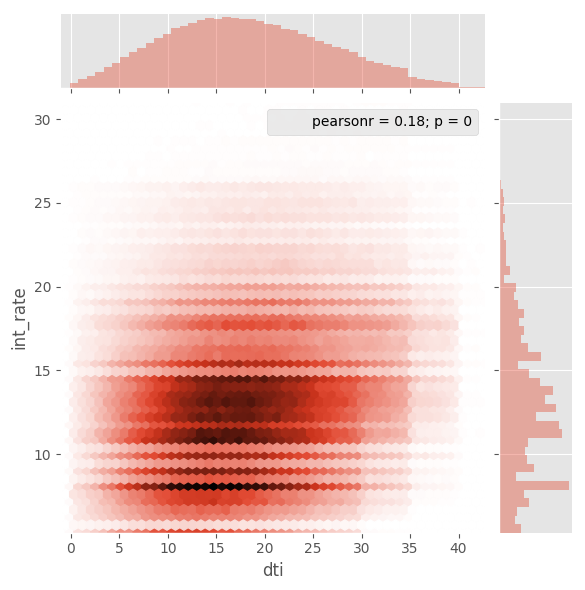

In [17]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html
# takes a long time because there are a lot of points, but works for smaller datasets
# f = sns.regplot(data=acc_df, x='dti', y='int_rate', fit_reg=False)
# instead, lets make a heatmap:
# http://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
mask = reject_outliers(acc_df['dti'], iq_range=0.85, return_mask=True)
f = sns.jointplot(data=acc_df.ix[mask, :], x='dti', y='int_rate', kind='hex', joint_kws=dict(gridsize=50))